# Hand crafted morpohology approach

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

test_dirs = os.listdir("all/stage1_test")
test_filenames=["all/stage1_test/"+file_id+"/images/"+file_id+".png" for file_id in test_dirs]
test_images=[cv2.imread(imagefile) for imagefile in test_filenames]

In [2]:
len(test_images)

65

In [16]:
# sliding window technique

def process(img_rgb):
    
    # green channel produce slightly better result than the grayscale image and other channels
    img_gray=img_rgb[:,:,1] 
    #cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
    
    # morphological opening
    circle7=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7))
    img_open=cv2.morphologyEx(img_gray, cv2.MORPH_OPEN, circle7)
    
    # otsu thresholding
    img_th=cv2.threshold(img_open,0,255,cv2.THRESH_OTSU)[1]
    # invert the image in case the objects of interest are in the dark side
    if(np.sum(img_th==255)>np.sum(img_th==0)):
        img_th=cv2.bitwise_not(img_th)
        
    #second morphological opening on binary image 
    bin_open=cv2.morphologyEx(img_th, cv2.MORPH_OPEN, circle7) 
    #connected components
    
    segmented_image =cv2.connectedComponents(bin_open)[1]
    #segmented_image =segment_on_dt(bin_open,20)
    
    return segmented_image


# Test 

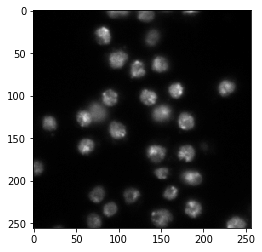

In [17]:
img = test_images[10]
plt.imshow(img)

In [18]:
img = cv2.imread("test1.jpg")

In [20]:
# segment input image
sg = process(img)

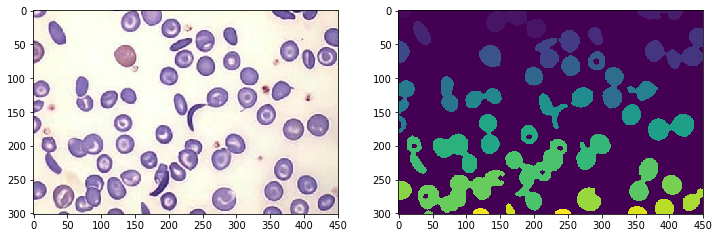

In [21]:
fig=plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(1,2,1)

ax1.imshow(img)
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(sg)

In [22]:
# run algo on all test set
test_connected_components =[process(img)  for img in test_images]

In [23]:
len(test_connected_components)

65

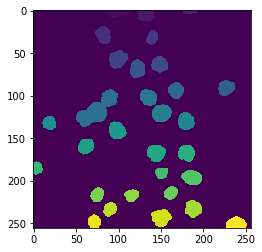

In [25]:
plt.imshow(test_connected_components[10])